In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',100)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
'''The TotalCharges is of type object because it has few blank values.So Change the value from ' ' to 0 '''
for i,j in enumerate(df['TotalCharges']):
    if j==' ':
       
        df['TotalCharges'][i]='0'
df['TotalCharges']=df['TotalCharges'].apply(lambda x:float(x))

In [5]:
df.sort_values('TotalCharges',ascending=False).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


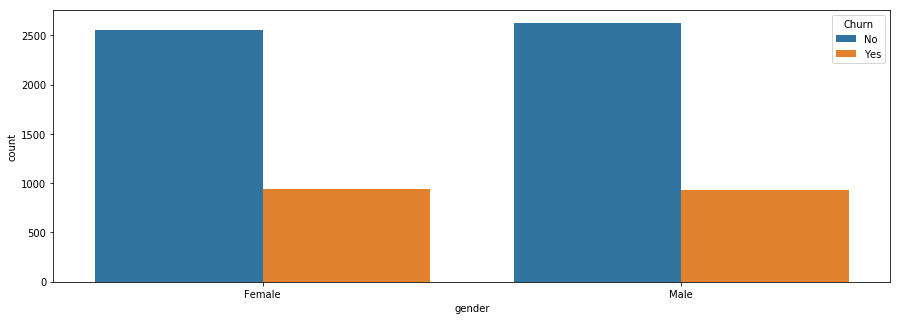

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['gender'],hue=df['Churn'])

In [7]:
'''Function to create a count plot'''
def countplot(x,churn):
    plt.figure(figsize=(12,3))
    ax=sns.countplot(x=x,hue=churn)
    return ax
    

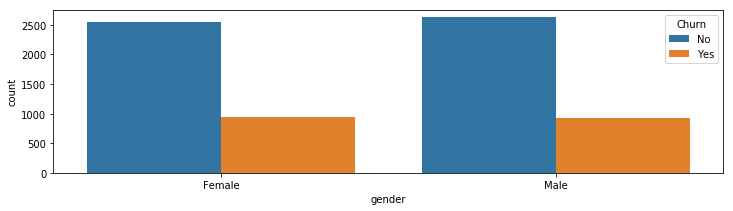

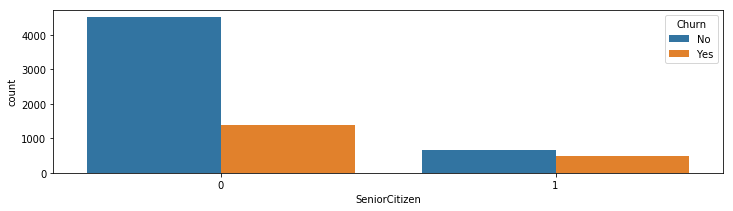

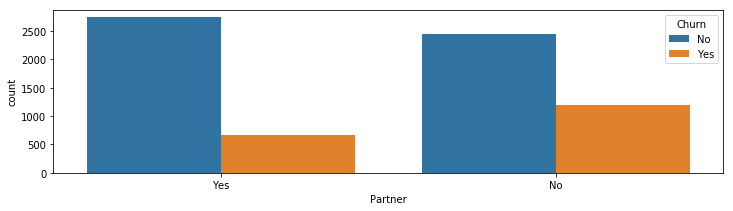

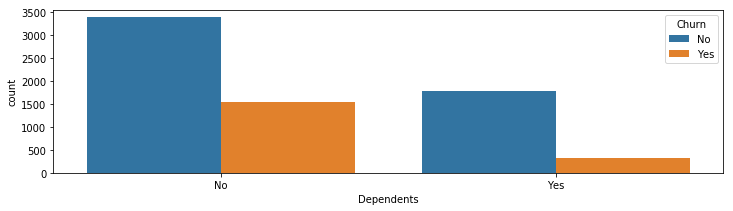

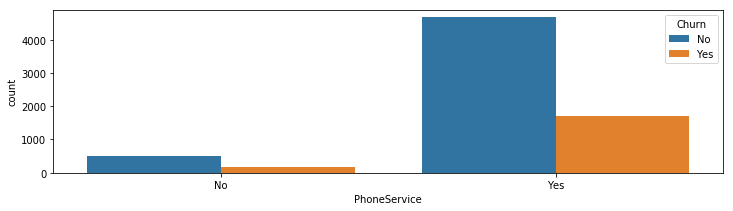

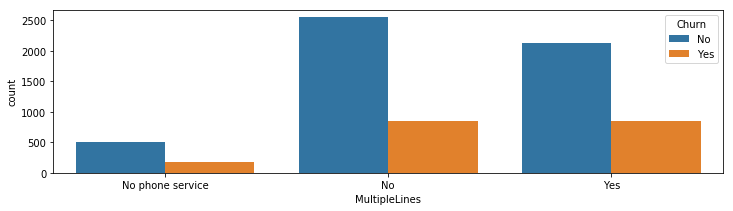

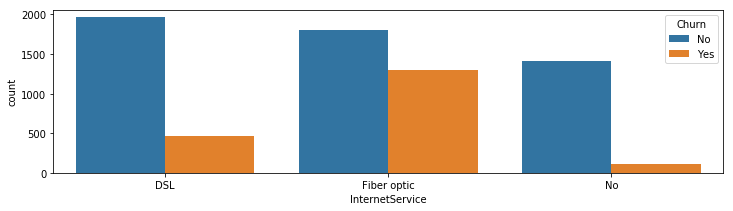

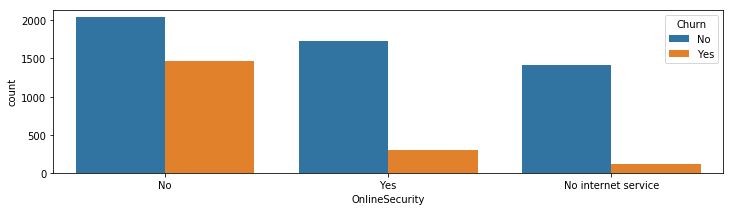

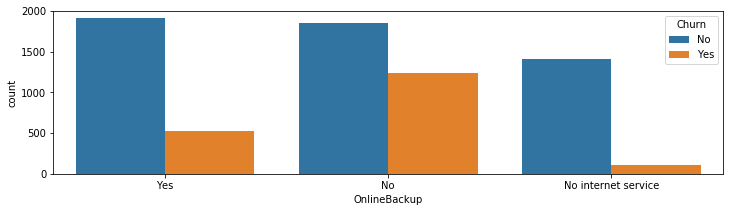

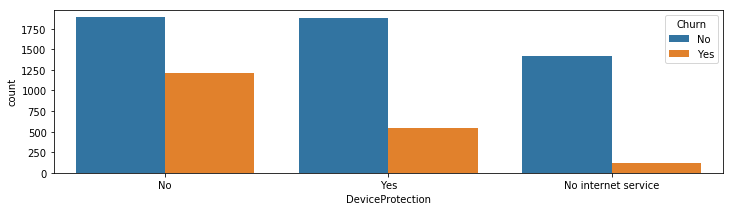

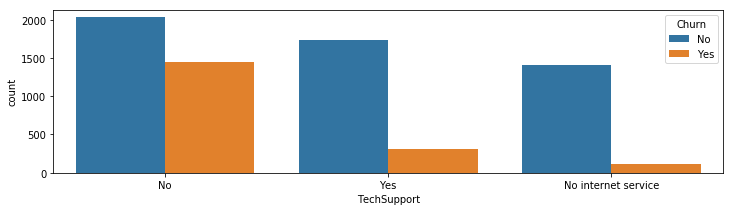

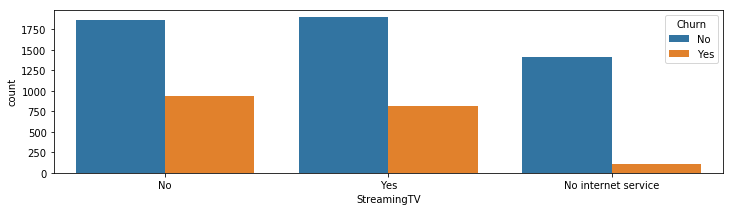

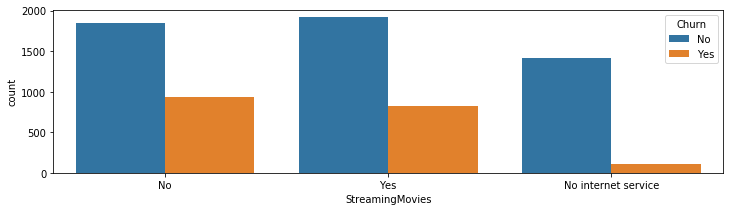

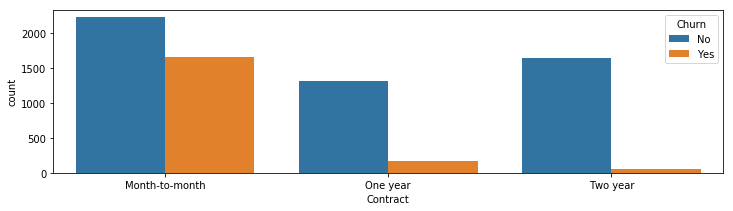

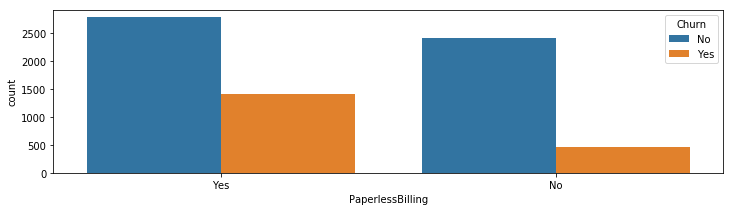

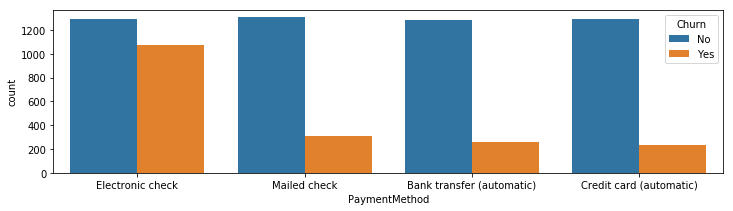

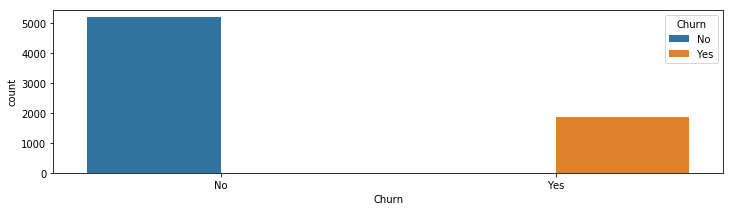

In [130]:
'''Plotting all the count plots who have less than 5 values in it and see if we have a correlation with the churn rate'''
churn=df['Churn']
for i in df.columns:
    if df[i].nunique()<5:
        countplot(df[i],churn)


Key Correlation of the Target Variable(Churning vs No Churning) with Different Feature Variables:

    1 -> Internet Service: Customer opting for fiber optic as the Internet Service are more likely to Churn  
    2 -> Online Security: Customer with No Online Security are more likely to Churn.
    3 -> Online Backup: Customer with No Online BackUp are more likely to Churn.
    4 -> Device Protection: Customer with No Device Protection are more likely to Churn.
    5 -> Tech Support: Customer with No Tech Support are more likely to Churn.
    6 -> Contract: Customer with Month to Month Contract are more likely to Churn.
    7 -> PaperLess Billing: Customer with PaperLess Billing are more likely to Churn.
    
We see Streaming Movies and Streaming TV also have a lot of Customer's Churning but we cannot see any correlation yet.I am guessing it might be because of the Price. We will explore more in detail later on and see if we can find any correlation.   

                                      
    
    
    

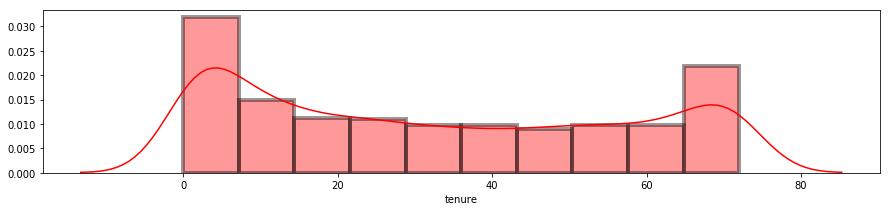

In [9]:
plt.figure(figsize=(15,3))
sns.distplot(df['tenure'],bins=10,color='red',hist_kws=dict(edgecolor="k",linewidth=4))

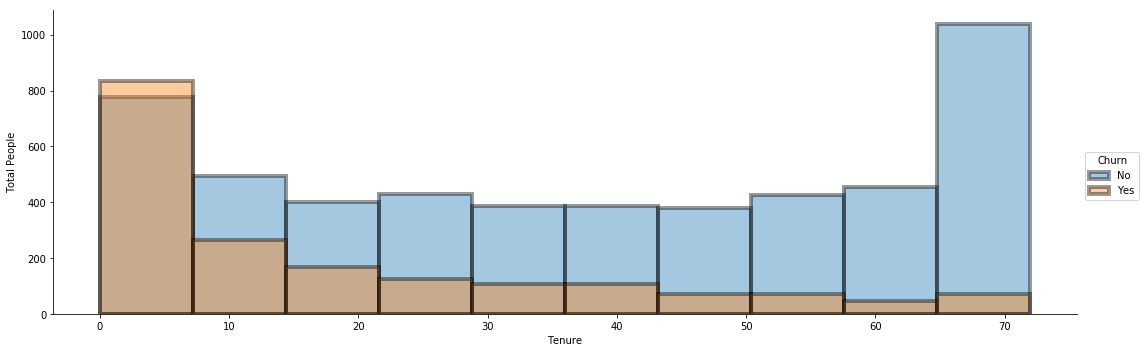

In [125]:
_, bins = np.histogram(df["tenure"])
g = sns.FacetGrid(df,hue="Churn",sharex=True,sharey=True,size=5,aspect=3)
g = g.map(sns.distplot, "tenure", bins=bins,kde=False,hist_kws=dict(edgecolor="k",linewidth=4))
g.add_legend()
g.set_titles('Churning vs Non Churning of the Customers based on their Tenure')
g.set_xlabels('Tenure')
g.set_ylabels('Total People')

We see more customers churn in the first 10 months than they stay.People who stays for a longer period of time are less likely to leave the service.Lets explore in detail why that is the case.

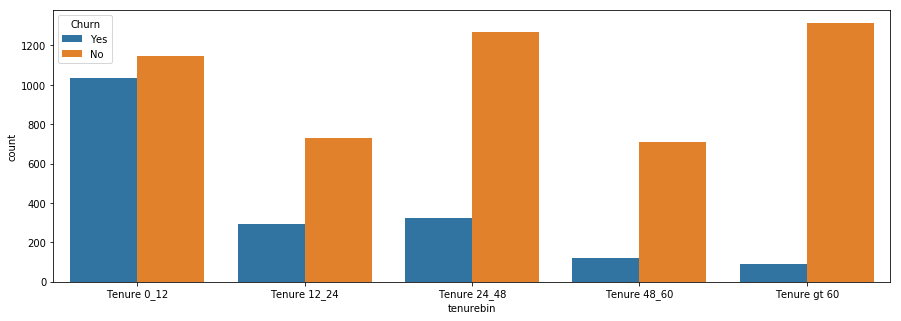

In [131]:
'''Another Way:- Creating the bin for the tenure column to see how it is related with churning'''
def bins(x):
    if x<13:
        return 'Tenure 0_12'
    elif x<25:
        return 'Tenure 12_24'
    elif x<49:
        return 'Tenure 24_48'
    elif x<61:
        return 'Tenure 48_60'
    else:
        return 'Tenure gt 60'
df['tenurebin']=df['tenure'].apply(lambda x:bins(x))   

plt.figure(figsize=(15,5))
sns.countplot(df['tenurebin'],hue=churn,order=['Tenure 0_12','Tenure 12_24','Tenure 24_48','Tenure 48_60','Tenure gt 60'],hue_order=['Yes','No'])

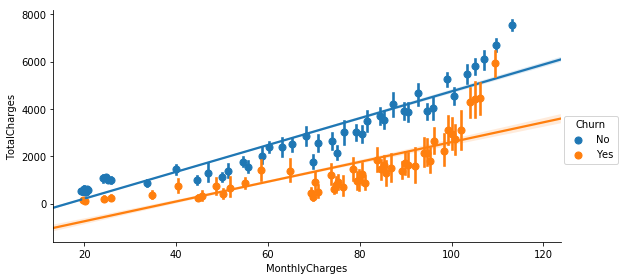

In [160]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df,hue="Churn",size=4,aspect=2,x_bins=50,legend_out=True)

One of the major reason for people leaving the telecom service is the Monthly Charge.

In [161]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurebin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure 0_12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure 24_48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure 0_12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure 24_48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure 0_12


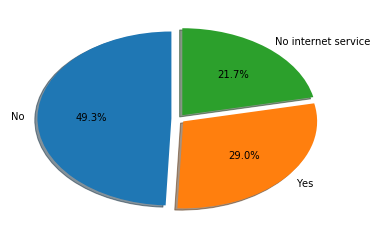

In [198]:
'''Another way of visualizing'''

techsupport=df['TechSupport'].value_counts()
labels=df['TechSupport'].unique()
plt.pie(x=techsupport,radius=1,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(0.05,0.05,0.05))
plt.show()

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenurebin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure 0_12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure 24_48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure 0_12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure 24_48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure 0_12


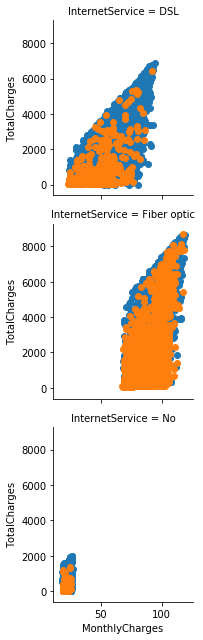

In [243]:
f = sns.FacetGrid(df,row="InternetService",hue='Churn',aspect=1,size=3)
#g = g.map(sns.distplot, "tenure", bins=bins,kde=False,hist_kws=dict(edgecolor="k",linewidth=4))
f.map(plt.scatter,"MonthlyCharges","TotalCharges")
plt.show()

In [ ]:
'''
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)



'''